In [2]:

import pandas as pd
import numpy as np
from pandas import DataFrame
from typing import Optional
import seaborn as sns
from matplotlib import pyplot as plt


from sklearn.model_selection import train_test_split

%matplotlib inline

In [3]:
def load_data_to_dta_frame(filepath:str)->Optional[DataFrame]:
  '''
  Load a csv file to a pandas data frame
  Args:
      filepath: str: path to the csv file
  Returns:
       DataFrame: a pandas data frame
  '''
  try:
    return pd.read_csv(filepath)
  except FileNotFoundError:
    print(f'file not found at {filepath}')
    return None
data = load_data_to_dta_frame('../data/raw/credit_risk_dataset.csv')

In [25]:
data.head().T

,0,1,2,3,4
person_age,22,21,25,23,24
person_income,59000,9600,9600,65500,54400
person_home_ownership,RENT,OWN,MORTGAGE,RENT,RENT
person_emp_length,123.0,5.0,1.0,4.0,8.0
loan_intent,PERSONAL,EDUCATION,MEDICAL,MEDICAL,MEDICAL
loan_grade,D,B,C,C,C
loan_amnt,35000,1000,5500,35000,35000
loan_int_rate,16.02,11.14,12.87,15.23,14.27
loan_status,1,0,1,1,1
loan_percent_income,0.59,0.1,0.57,0.53,0.55


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [22]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [23]:
data.shape

(32581, 12)

In [24]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


In [26]:
data.head().T

,0,1,2,3,4
person_age,22,21,25,23,24
person_income,59000,9600,9600,65500,54400
person_home_ownership,RENT,OWN,MORTGAGE,RENT,RENT
person_emp_length,123.0,5.0,1.0,4.0,8.0
loan_intent,PERSONAL,EDUCATION,MEDICAL,MEDICAL,MEDICAL
loan_grade,D,B,C,C,C
loan_amnt,35000,1000,5500,35000,35000
loan_int_rate,16.02,11.14,12.87,15.23,14.27
loan_status,1,0,1,1,1
loan_percent_income,0.59,0.1,0.57,0.53,0.55


In [27]:
def rename_observation(data:DataFrame)->DataFrame:
  '''
  Rename the observation column to id
  Args:
      data: DataFrame: a pandas data frame
  Returns:
       DataFrame: a pandas data frame
  '''
  for col in data.columns:
    if data[col].dtype == 'object':
      data[col] = data[col].str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
  return data


In [28]:
data = rename_observation(data)
data.head().T

,0,1,2,3,4
person_age,22,21,25,23,24
person_income,59000,9600,9600,65500,54400
person_home_ownership,rent,own,mortgage,rent,rent
person_emp_length,123.0,5.0,1.0,4.0,8.0
loan_intent,personal,education,medical,medical,medical
loan_grade,d,b,c,c,c
loan_amnt,35000,1000,5500,35000,35000
loan_int_rate,16.02,11.14,12.87,15.23,14.27
loan_status,1,0,1,1,1
loan_percent_income,0.59,0.1,0.57,0.53,0.55


In [29]:
data.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,rent,123.0,personal,d,35000,16.02,1,0.59,y,3
1,21,9600,own,5.0,education,b,1000,11.14,0,0.10,n,2
2,25,9600,mortgage,1.0,medical,c,5500,12.87,1,0.57,n,3
3,23,65500,rent,4.0,medical,c,35000,15.23,1,0.53,n,2
4,24,54400,rent,8.0,medical,c,35000,14.27,1,0.55,y,4
5,21,9900,own,2.0,venture,a,2500,7.14,1,0.25,n,2
6,26,77100,rent,8.0,education,b,35000,12.42,1,0.45,n,3
7,24,78956,rent,5.0,medical,b,35000,11.11,1,0.44,n,4
8,24,83000,rent,8.0,personal,a,35000,8.90,1,0.42,n,2
9,21,10000,own,6.0,venture,d,1600,14.74,1,0.16,n,3


In [33]:
data.duplicated().sum()

165

In [34]:
data = data.drop_duplicates()

In [35]:
data.duplicated().sum()

0

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           31529 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               29321 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


In [43]:
data.loan_int_rate.median()

10.99

In [39]:

# Calculate skewness for a specific column, e.g., 'loan_int_rate'
print("Skewness of loan_int_rate:", data['loan_int_rate'].skew())

Skewness of loan_int_rate: 0.2070016541005385


In [42]:
print("Skewness of loan_int_rate:", data['person_emp_length'].skew())

Skewness of loan_int_rate: 2.619915431174932


In [44]:
data['loan_int_rate'].fillna(data['loan_int_rate'].median(), inplace=True)

In [46]:
# Fill with mode
data['person_emp_length'].fillna(data['person_emp_length'].mode()[0], inplace=True)

In [47]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [49]:
data.loan_status.value_counts()

loan_status
0    25327
1     7089
Name: count, dtype: int64

In [51]:
data.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [4]:
numerical_features = data.select_dtypes(include=[np.number]).columns
numerical_features

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')

In [6]:
# Assuming `data` is your DataFrame and `numerical_features` is a list of numerical column names
for i in numerical_features:
    # Access the DataFrame column using `data[i]`
    print(i, data[i].skew())


person_age 2.5813925261849846
person_income 32.865348833904434
person_emp_length 2.6144551214595424
loan_amnt 1.1924774277661998
loan_int_rate 0.2085503016908977
loan_status 1.3648884873271683
loan_percent_income 1.0646686367683245
cb_person_cred_hist_length 1.6617901199126253


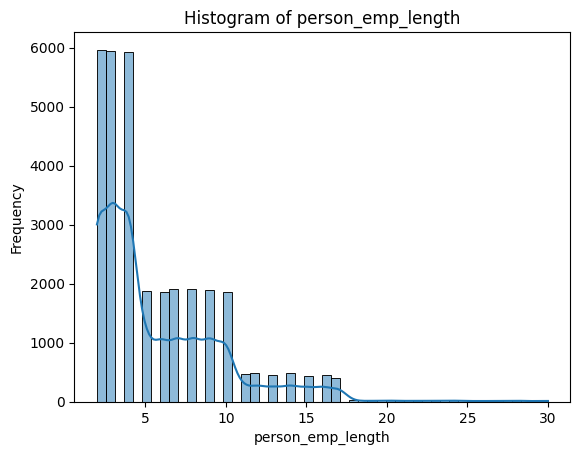

In [8]:
sns.histplot(data['cb_person_cred_hist_length'],bins=50,kde=True)
plt.ylabel('Frequency')
plt.xlabel('person_emp_length')
plt.title('Histogram of person_emp_length')
plt.show()

In [13]:


from scipy.stats import boxcox

data['cb_person_cred_hist_length'], _ = boxcox(data['cb_person_cred_hist_length'] + 1)

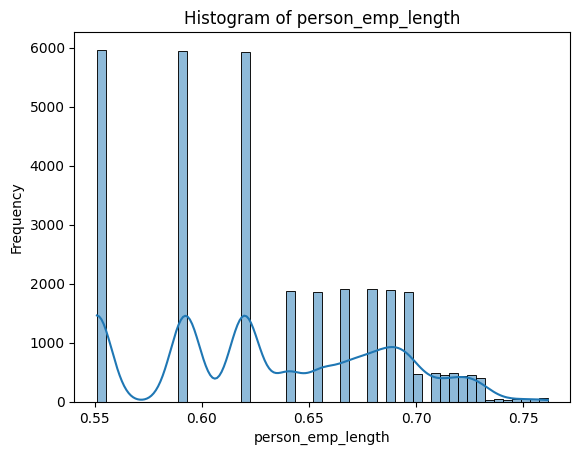

In [14]:
sns.histplot(data['cb_person_cred_hist_length'],bins=50,kde=True)
plt.ylabel('Frequency')
plt.xlabel('person_emp_length')
plt.title('Histogram of person_emp_length')
plt.show()

person_age - Original Skewness: 2.5813925261849846
Log Transformation applied to person_age


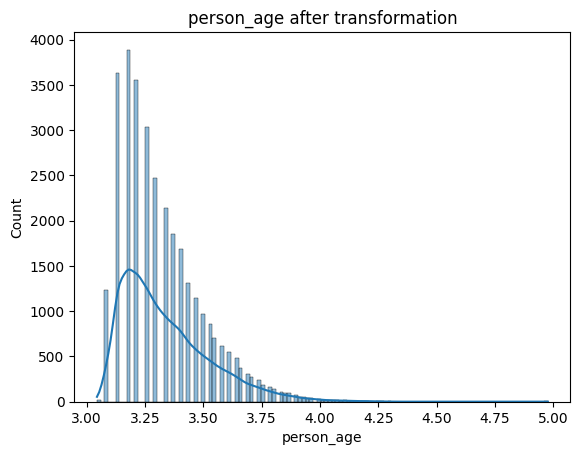

person_income - Original Skewness: 32.865348833904434
Log Transformation applied to person_income


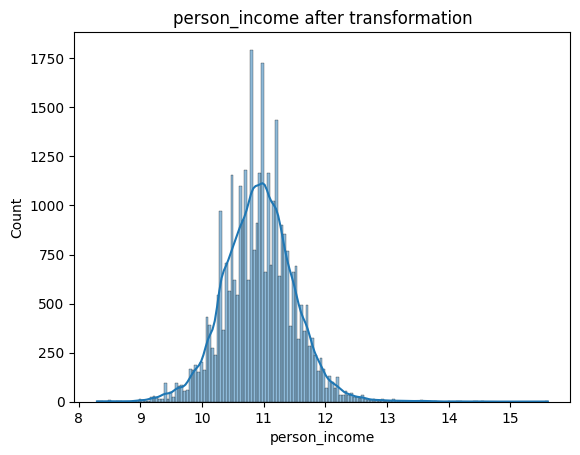

person_emp_length - Original Skewness: 2.6144551214595424
Log Transformation applied to person_emp_length


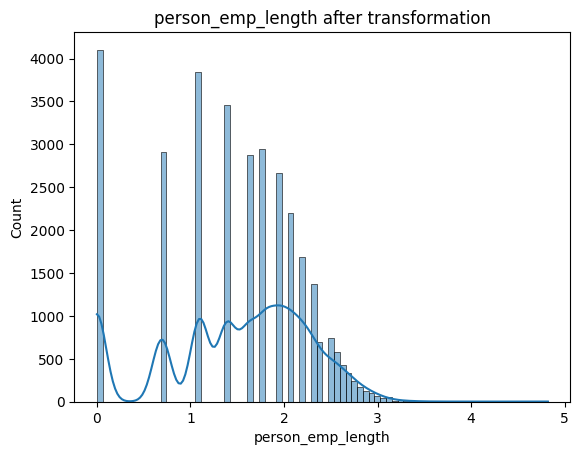

loan_amnt - Original Skewness: 1.1924774277661998
Log Transformation applied to loan_amnt


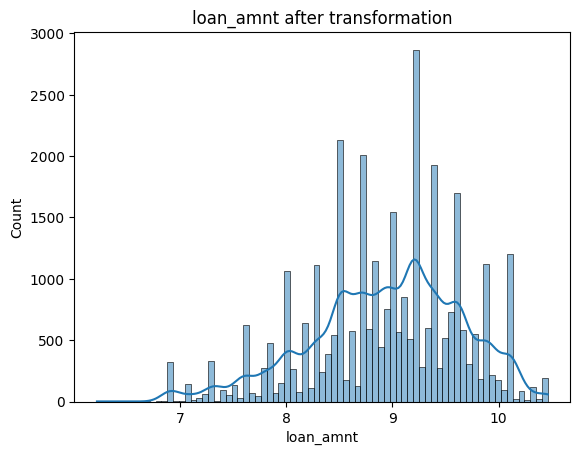

loan_int_rate - Original Skewness: 0.2085503016908977
Standardization applied to loan_int_rate


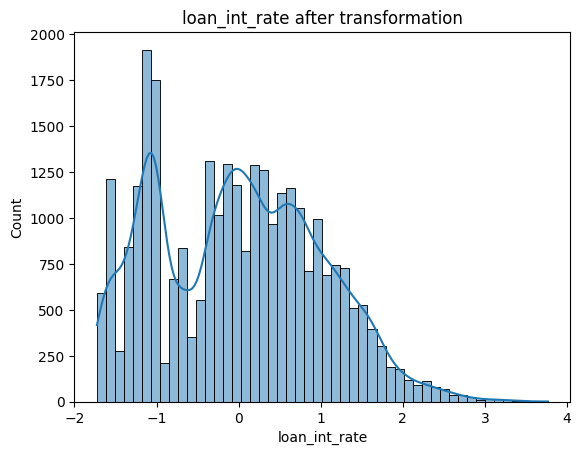

loan_status - Original Skewness: 1.3648884873271683
Log Transformation applied to loan_status


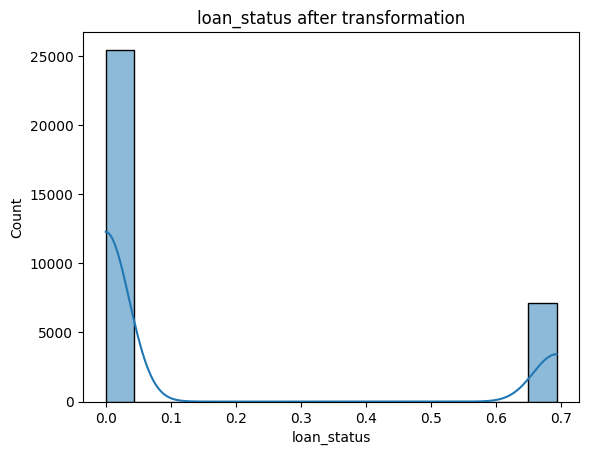

loan_percent_income - Original Skewness: 1.0646686367683245
Log Transformation applied to loan_percent_income


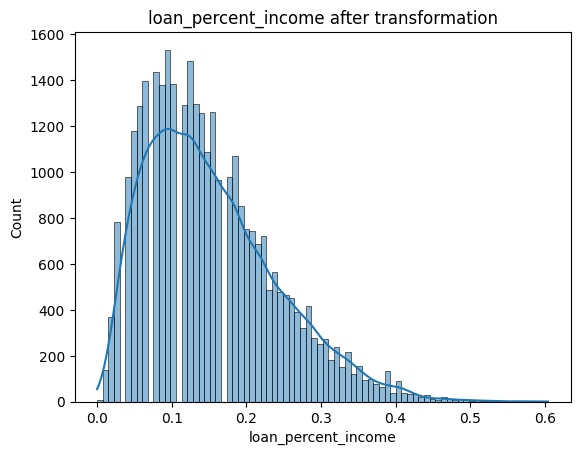

cb_person_cred_hist_length - Original Skewness: 0.09107750236747947
Standardization applied to cb_person_cred_hist_length


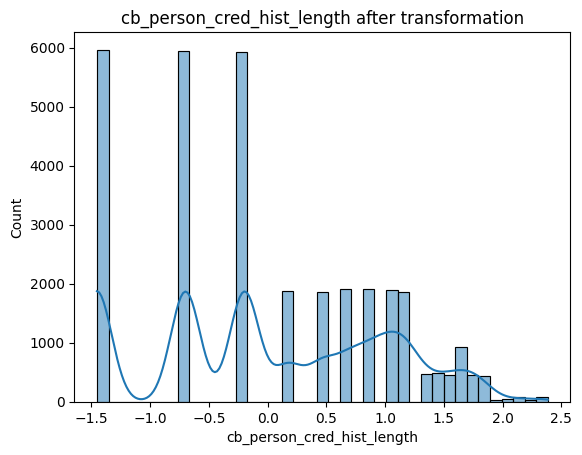

In [15]:
for feature in numerical_features:
    skewness = data[feature].skew()
    print(f"{feature} - Original Skewness: {skewness}")

    # Choose transformation based on skewness
    if skewness > 1:
        # Highly skewed, use log transformation (add 1 to handle zeros)
        data[feature] = np.log1p(data[feature])
        print(f"Log Transformation applied to {feature}")
    elif 0.5 < skewness <= 1:
        # Moderately skewed, use square root transformation
        data[feature] = np.sqrt(data[feature])
        print(f"Square Root Transformation applied to {feature}")
    else:
        # For slightly skewed or symmetric, use standardization
        data[feature] = (data[feature] - data[feature].mean()) / data[feature].std()
        print(f"Standardization applied to {feature}")

    # Visualize transformed data
    sns.histplot(data[feature], kde=True)
    plt.title(f"{feature} after transformation")
    plt.show()

In [18]:
category_features = data.select_dtypes(include='O').columns
category_features


Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [20]:
data[category_features].head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,PERSONAL,D,Y
1,OWN,EDUCATION,B,N
2,MORTGAGE,MEDICAL,C,N
3,RENT,MEDICAL,C,N
4,RENT,MEDICAL,C,Y


In [21]:
data['loan_intent'].value_counts()

loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

In [4]:
data['person_home_ownership'].value_counts()

person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

In [5]:
data['loan_grade'].value_counts()

loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64

In [6]:
data['cb_person_default_on_file'].value_counts()

cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64